Populating the interactive namespace from numpy and matplotlib
Cu_orbs =  ['dx2y2']
O1_orbs =  ['px']
O2_orbs =  ['py']
ap_orbs =  []


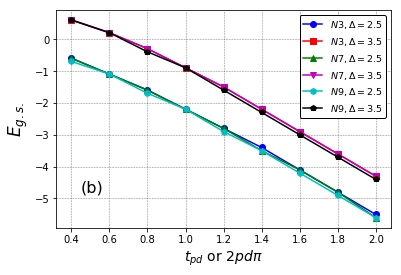

In [1]:
# Supplemental program for 1A1_lowest_peak_dispersion.ipynb
# to compare the Aw and w position for the lowest peak in 1A1 channel
# for 3-, 7-orbital models

%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')
from pylab import *

import parameters as pam
import lattice as lat
import variational_space as vs
import hamiltonian as ham
import basis_change as basis
import lanczos

ed = 0
tpp = 0.65

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

Npts = 9

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0
Mc = 16


fNorb3 = 'Norb3_tpp'+str(tpp)+'_Upp'+str(Upp)+'_Mc'+str(Mc)+'_eta0.1.txt'
fNorb7 = 'Norb7_tpp0.65_B0.15_C0.58_Upp0_Mc16_eta0.1_1A1.txt'
fNorb9 = 'Norb9_pps1.0_ppp0.3_B0.15_C0.58_Upp0_Mc16_eta0.1_1A1.txt'
titlename = 'tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Udd'+str(Udd)+'_Upp'+str(Upp)      
    
##########################################################################
# E of lowest peak
##########################################################################
Ms = ['-b','-r','-g','-m','-c','-k','-y','--b','--r','--g','--m','--c','--k','--y']
a = loadtxt('./data_lowpeak/'+fNorb3,skiprows=0)
  
plot(a[0:Npts,2], a[0:Npts,3], '-bo', label="$N3, \Delta=2.5$")
plot(a[Npts:2*Npts,2], a[Npts:2*Npts,3], '-rs', label="$N3, \Delta=3.5$")

a = loadtxt('./data_lowpeak/'+fNorb7,skiprows=0)
  
plot(a[0:Npts,2], a[0:Npts,3], '-g^', label="$N7, \Delta=2.5$")
plot(a[Npts:2*Npts,2], a[Npts:2*Npts,3], '-mv', label="$N7, \Delta=3.5$")

a = loadtxt('./data_lowpeak/'+fNorb9,skiprows=0)
  
plot(2.*a[0:Npts,3], a[0:Npts,4], '-ch', label="$N9, \Delta=2.5$")
plot(2.*a[Npts:2*Npts,3], a[Npts:2*Npts,4], '-kp', label="$N9, \Delta=3.5$")

#title(titlename, fontsize=8)
xlabel('$t_{pd}$ or $2pd\pi$',fontsize=14)
ylabel('$E_{g.s.}$',fontsize=17)
text(0.45, -4.8, '(b)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("w_lowpeak_"+titlename+".pdf")

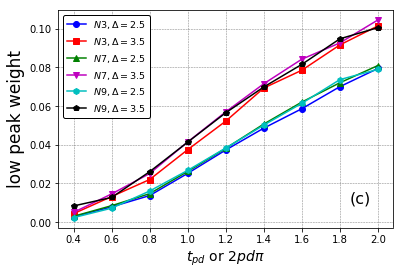

In [2]:
##########################################################################
# weight of lowest peak
##########################################################################
#clf()
a = loadtxt('./data_lowpeak/'+fNorb3,skiprows=0)
  
plot(a[0:Npts,2], a[0:Npts,4], '-bo', label="$N3, \Delta=2.5$")
plot(a[Npts:2*Npts,2], a[Npts:2*Npts,4], '-rs', label="$N3, \Delta=3.5$")

a = loadtxt('./data_lowpeak/'+fNorb7,skiprows=0)
  
plot(a[0:Npts,2], a[0:Npts,4], '-g^', label="$N7, \Delta=2.5$")
plot(a[Npts:2*Npts,2], a[Npts:2*Npts,4], '-mv', label="$N7, \Delta=3.5$")

a = loadtxt('./data_lowpeak/'+fNorb9,skiprows=0)
  
plot(2.*a[0:Npts,3], a[0:Npts,5], '-ch', label="$N9, \Delta=2.5$")
plot(2.*a[Npts:2*Npts,3], a[Npts:2*Npts,5], '-kp', label="$N9, \Delta=3.5$")

#title(titlename, fontsize=8)
xlabel('$t_{pd}$ or $2pd\pi$',fontsize=14)
ylabel('low peak weight',fontsize=17)
text(1.85, 0.01, '(c)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("weight_lowpeak_"+titlename+".pdf")